In [119]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [120]:
def lpc(x, lag):
    r_p = []
    y = None
    for p in range(0, lag):
        y = np.roll(x, p)
        r_p.append(np.correlate(x, y))
    return r_p

In [121]:
def toeplitz(x):
    M = len(x)
    covmatrix = np.zeros((M,M))
    for i in range(0,M):
        covmatrix[[i],i:M] = np.array(x[0:M-i]).T
        covmatrix[i:M,i] = x[0:M-i]
    return covmatrix

In [122]:
noise = np.random.random((50000,1))

In [123]:
x = lfilter(np.ones(4), [1, 1/2, 1/3, 1/4], noise)
x = x[len(x)-4096:len(x)]

In [124]:
r_p = lpc(x.flatten(), 3)
covmatrix = toeplitz(r_p)
Acoeffs,resid,rank,s = np.linalg.lstsq((covmatrix),-1*np.array(r_p), rcond=None)
print(Acoeffs)
est_x = lfilter((np.append(0, -1*Acoeffs[1:])), np.ones(len(Acoeffs)), x)

[[-1.00000000e+00]
 [-4.26296615e-16]
 [ 3.11692451e-16]]


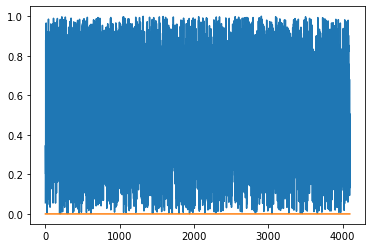

In [118]:
plt.plot(x)
plt.plot(est_x)